## Insurance Claims- Fraud Detection

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the datatset
df=pd.read_csv('Automobile_insurance_fraud.csv')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
#Lets check first 5 rows of the data
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#Lets see the last 5 rows
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26-02-2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
#Lets check the shape of the dataset
print("The dataset have  {} rows and  {} columns.".format(df.shape[0],df.shape[1]))

The dataset have  1000 rows and  40 columns.


In [6]:
#Lets check the datatypes of features
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
#Checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

 There are no null values in the dataset

In [8]:
# removing column named _c39 as it contains only null values
df = df.drop(['_c39'], axis = 1)

In [9]:
#checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Here we can see that we need to change the datatypes of some columns.

In [10]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

In [11]:
# we can see some missing values denoted by '?'

df.replace('?', np.nan, inplace = True)

In [12]:
# missing values
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Here we can see that some values are missing in the collision_type , property_damage and police_report_available features.

#### Filling Missing values

In [13]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [14]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [15]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [16]:
#Lets check again
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

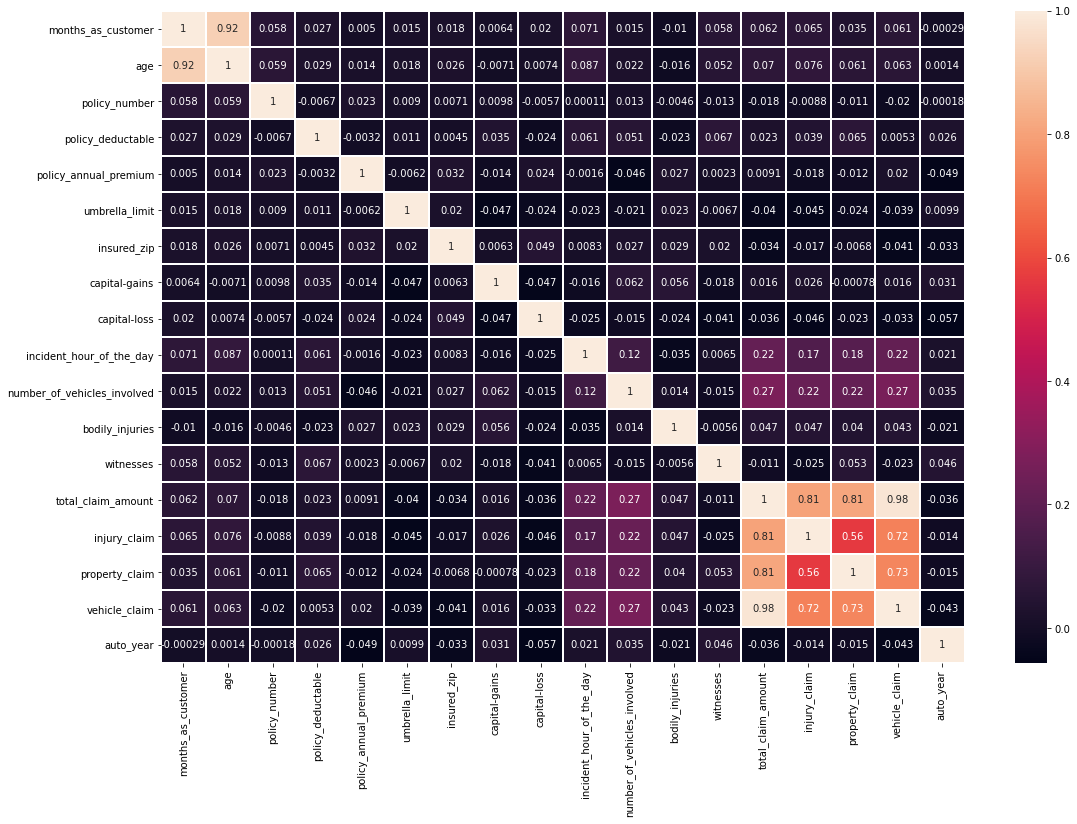

In [17]:
# heatmap

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [18]:
#lets check the unique values for columns
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

From here we can drop some of the columns: 'policy_number','policy_bind_date','policy_state','insured_zip',
'incident_location','incident_date','incident_state','incident_city',
'insured_hobbies','auto_make','auto_model','auto_year' as these columns does not contain very unique values.

In [19]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_csl','policy_state',
           'insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies',
           'auto_make','auto_model','auto_year']

df.drop(to_drop, inplace = True, axis = 1)

In [20]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


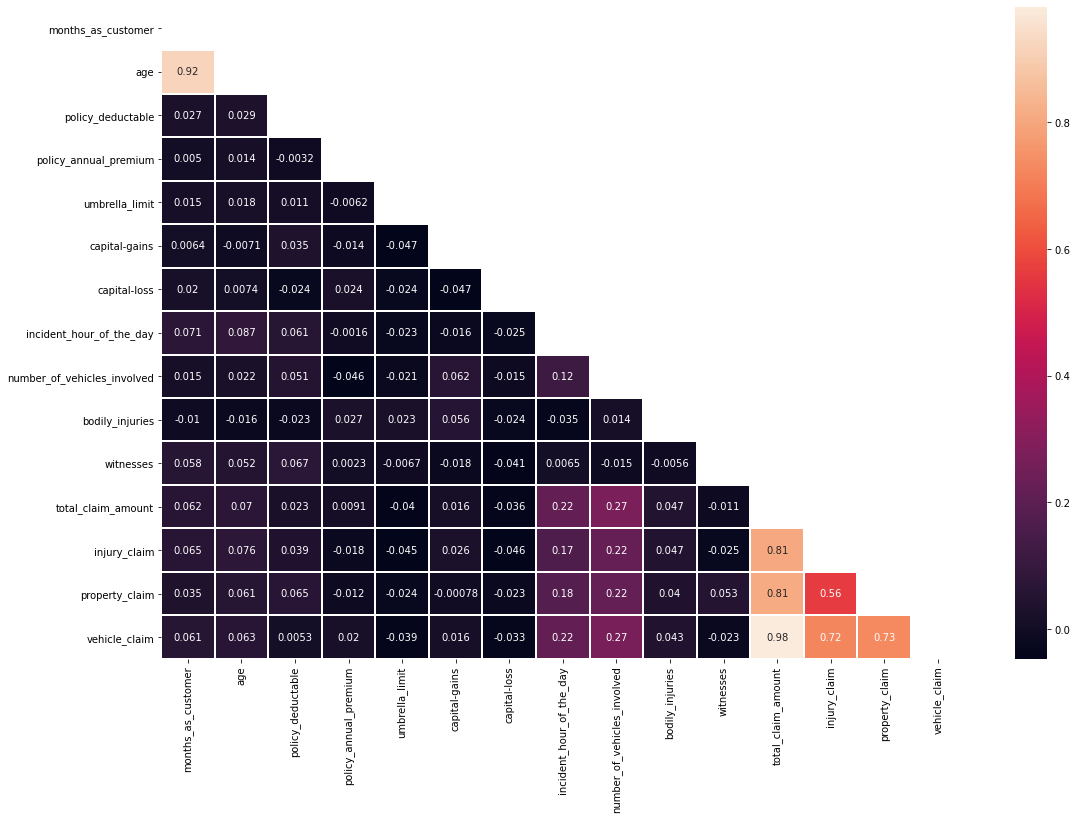

In [21]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [22]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [23]:
df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,780,780,3510,Y
2,134,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,1300,650,4550,N


In [24]:
#Lets change the target column into integer datatype
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)

In [25]:
#Counting the unique values in the target column
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

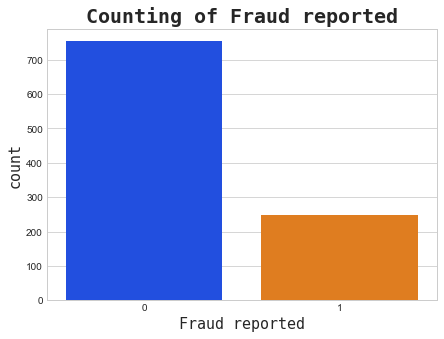

In [26]:
# Creating a barplot for 'fraud_reported'
fraud = df['fraud_reported'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(fraud.index, fraud.values, palette='bright')
plt.title('Counting of Fraud reported', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Fraud reported', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Our data is very imbalanced.

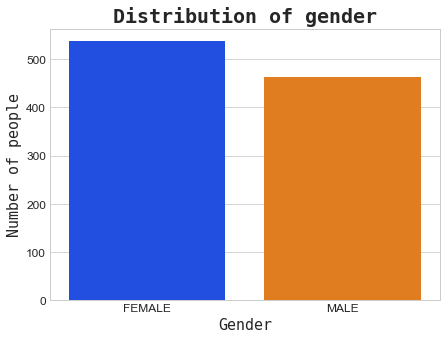

In [27]:
#lets see the Distribution of gender of the people 
gender = df['insured_sex'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(gender.index,gender.values,  palette='bright')
plt.title('Distribution of gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Gender', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here we can see that femae claimers are more than the Male.

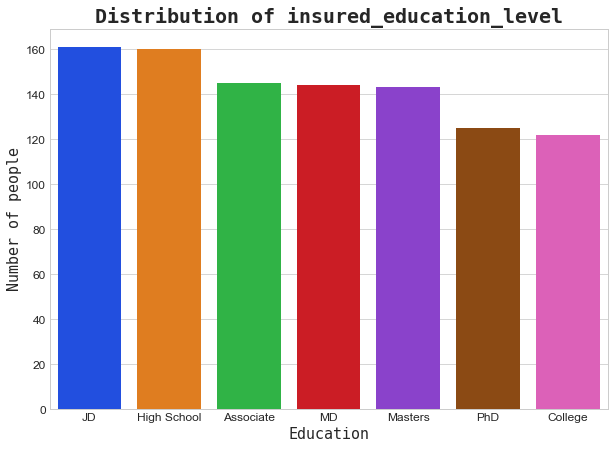

In [28]:
#lets see the  insured_education_level of the people 
edu = df['insured_education_level'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 7))
sns.barplot(edu.index,edu.values,  palette='bright')
plt.title('Distribution of insured_education_level', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here we can see that People with JD degree and High school degree claim more for the Insurance

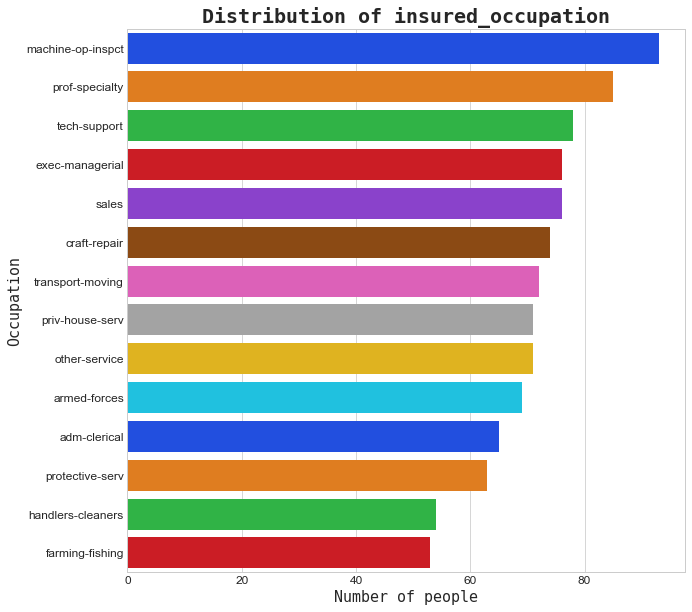

In [29]:
#lets see the  insured_occupation of the people 
occ = df['insured_occupation'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
sns.barplot(y=occ.index,x=occ.values,  palette='bright')
plt.title('Distribution of insured_occupation', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Occupation', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Most claimer people have the occupation of Machine-op-inspct , prof-speciality and tech-support

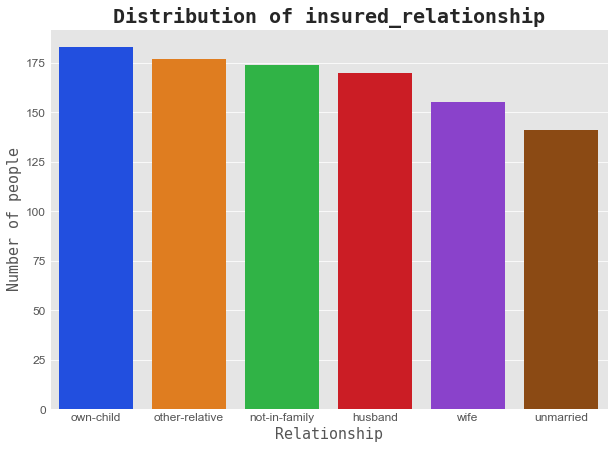

In [30]:
#lets see the  insured_relationship of the people 
rel = df['insured_relationship'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
sns.barplot(rel.index,rel.values,  palette='bright')
plt.title('Distribution of insured_relationship', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Relationship', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here most of the insured_relationship are own-child

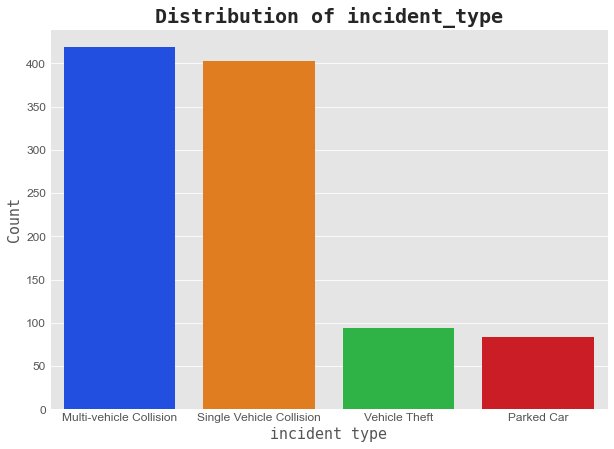

In [31]:
#lets see the  incident_type 
inc_type = df['incident_type'].value_counts()
plt.style.use('ggplot')

plt.figure(figsize=(10, 7))
sns.barplot(inc_type.index,inc_type.values,  palette='bright')
plt.title('Distribution of incident_type', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('incident type', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here most of the claimer are those whose vehicles are comes under the Multi-vehicle Collision 

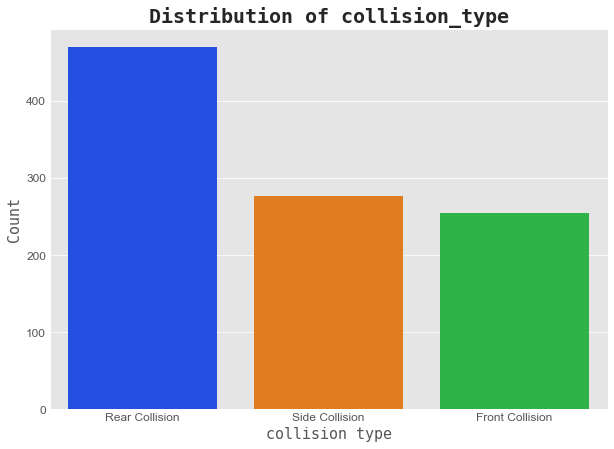

In [32]:
#lets see the  collision_type 
coll_type = df['collision_type'].value_counts()
plt.style.use('ggplot')

plt.figure(figsize=(10, 7))
sns.barplot(coll_type.index,coll_type.values,  palette='bright')
plt.title('Distribution of collision_type', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('collision type', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here most of collisions are from the rear side as people were seems recording while driving

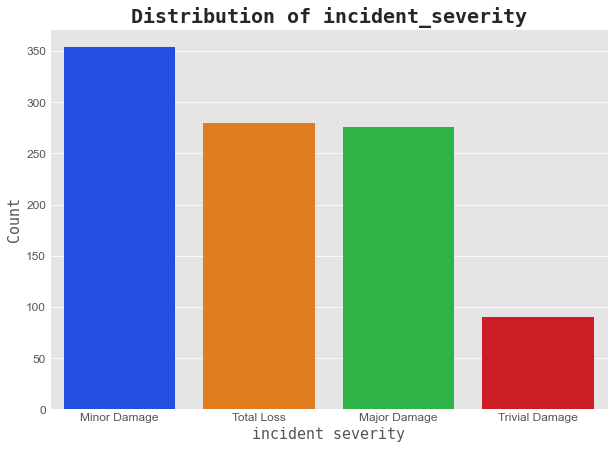

In [33]:
#lets see the  incident_severity 
inci = df['incident_severity'].value_counts()
plt.style.use('ggplot')

plt.figure(figsize=(10, 7))
sns.barplot(inci.index,inci.values,  palette='bright')
plt.title('Distribution of incident_severity', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('incident severity', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here most of Incidents where claim is done are for the Minor damage.

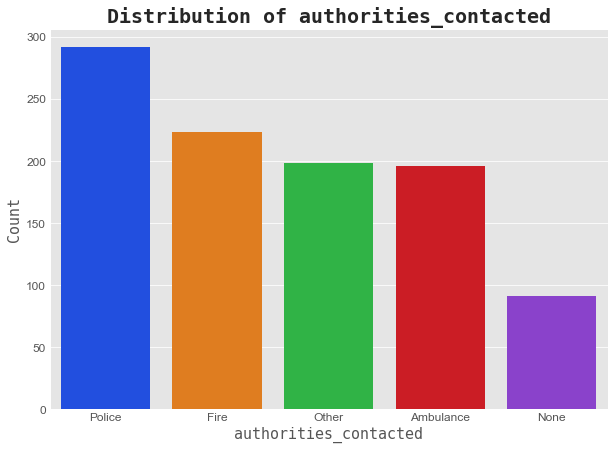

In [34]:
#lets see the  authorities_contacted 
auc = df['authorities_contacted'].value_counts()
plt.style.use('ggplot')

plt.figure(figsize=(10, 7))
sns.barplot(auc.index,auc.values,  palette='bright')
plt.title('Distribution of authorities_contacted', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('authorities_contacted', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Most of the people calls the police when there accident happend.

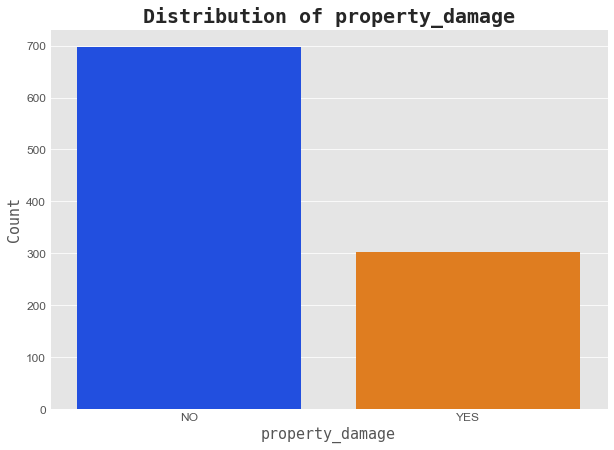

In [35]:
#lets see the  property_damage 
pd = df['property_damage'].value_counts()
plt.style.use('ggplot')

plt.figure(figsize=(10, 7))
sns.barplot(pd.index,pd.values,  palette='bright')
plt.title('Distribution of property_damage', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('property_damage', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

In most of the cases when claiming is done when there is No property damaged 

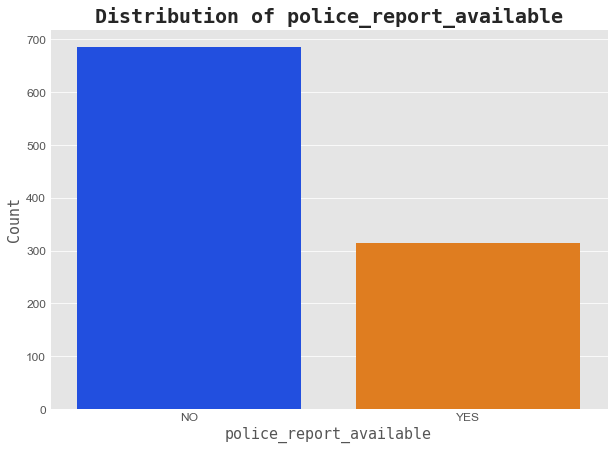

In [36]:
#lets see the  police_report_available 
pra = df['police_report_available'].value_counts()
plt.style.use('ggplot')

plt.figure(figsize=(10, 7))
sns.barplot(pra.index,pra.values,  palette='bright')
plt.title('Distribution of police_report_available', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('police_report_available', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here we can see that in most of the cases no police complaint is done as those incidents where minors.

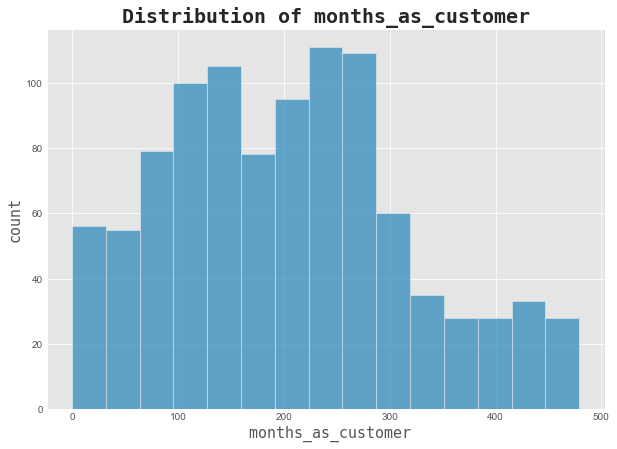

In [37]:
# Creating a histogram plot for 'months_as_customer'
months_as_customer = df['months_as_customer'].value_counts()

plt.figure(figsize=(10, 7))
sns.histplot(df['months_as_customer'])
plt.title('Distribution of months_as_customer', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel(' months_as_customer', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that claimer persons are mainly customer of between 200 to 300 months having the services.

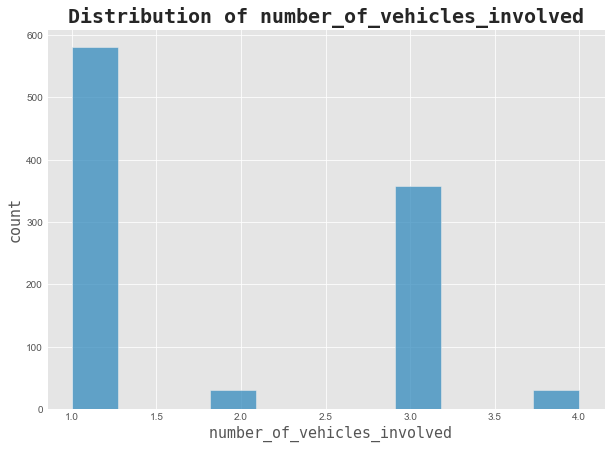

In [38]:
# Creating a histogram plot for 'number_of_vehicles_involved'
number_of_vehicles_involved = df['number_of_vehicles_involved'].value_counts()

plt.figure(figsize=(10, 7))
sns.histplot(df['number_of_vehicles_involved'])
plt.title('Distribution of number_of_vehicles_involved', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel(' number_of_vehicles_involved', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that in accident fom single vehicle are claimed more for the insurance.

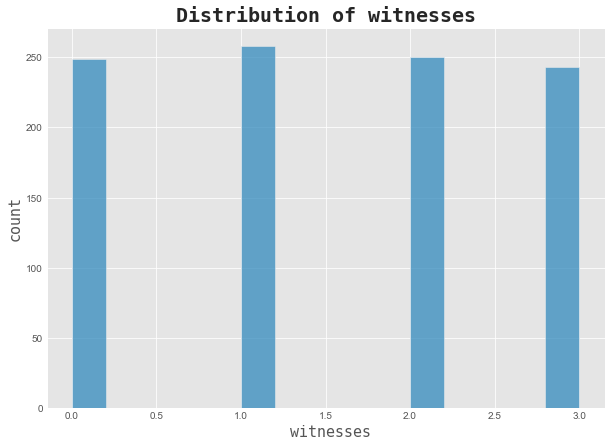

In [39]:
# Creating a histogram plot for 'witnesses'
witnesses = df['witnesses'].value_counts()

plt.figure(figsize=(10, 7))
sns.histplot(df['witnesses'])
plt.title('Distribution of witnesses', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel(' witnesses', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Most of the time witnesses are not presented while maximum time they are present. and in both the cases claiming for the insurance is done.

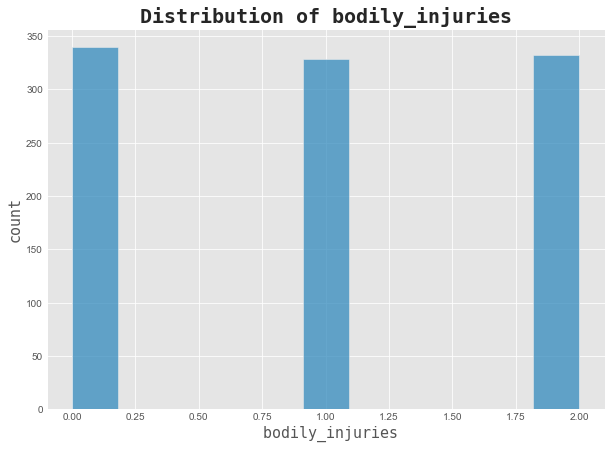

In [40]:
# Creating a histogram plot for 'bodily_injuries'

plt.figure(figsize=(10, 7))
sns.histplot(df['bodily_injuries'])
plt.title('Distribution of bodily_injuries', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel(' bodily_injuries', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that it almost equal when the bodily injuries happened and claimed after that , while in the same case when bodily injuries not happend then also claim is done

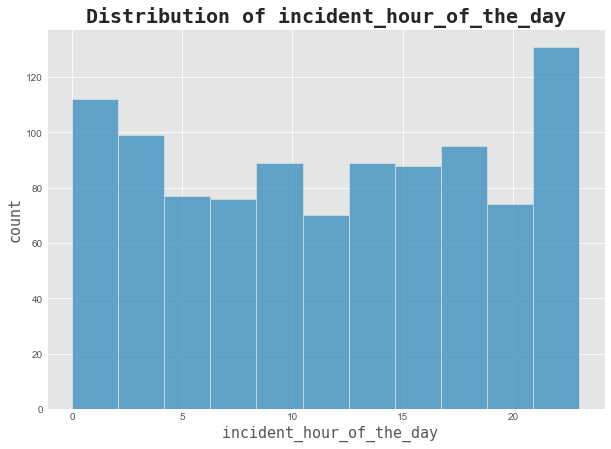

In [41]:
# Creating a histogram plot for 'incident_hour_of_the_day'

plt.figure(figsize=(10, 7))
sns.histplot(df['incident_hour_of_the_day'])
plt.title('Distribution of incident_hour_of_the_day', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel(' incident_hour_of_the_day', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that the incident hour of the day is mainly in the night and people claim more those who have accident in the night.

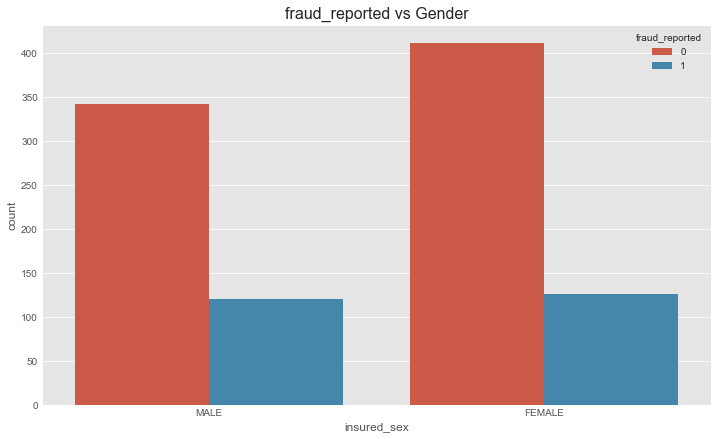

In [42]:

plt.figure(figsize=(12, 7))
sns.countplot(x=df["insured_sex"],hue=df["fraud_reported"])
plt.title("fraud_reported vs Gender", fontsize = 16)
plt.show()

Here most of the Female are those who deosnot false claimed.

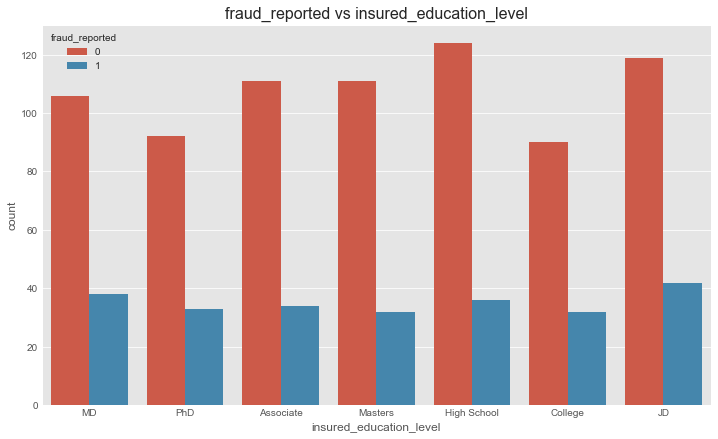

In [43]:
plt.figure(figsize=(12, 7))
sns.countplot(x=df["insured_education_level"],hue=df["fraud_reported"])
plt.title("fraud_reported vs insured_education_level", fontsize = 16)
plt.show()

here the Most false claim are claimed  by the JD eductaion level people.

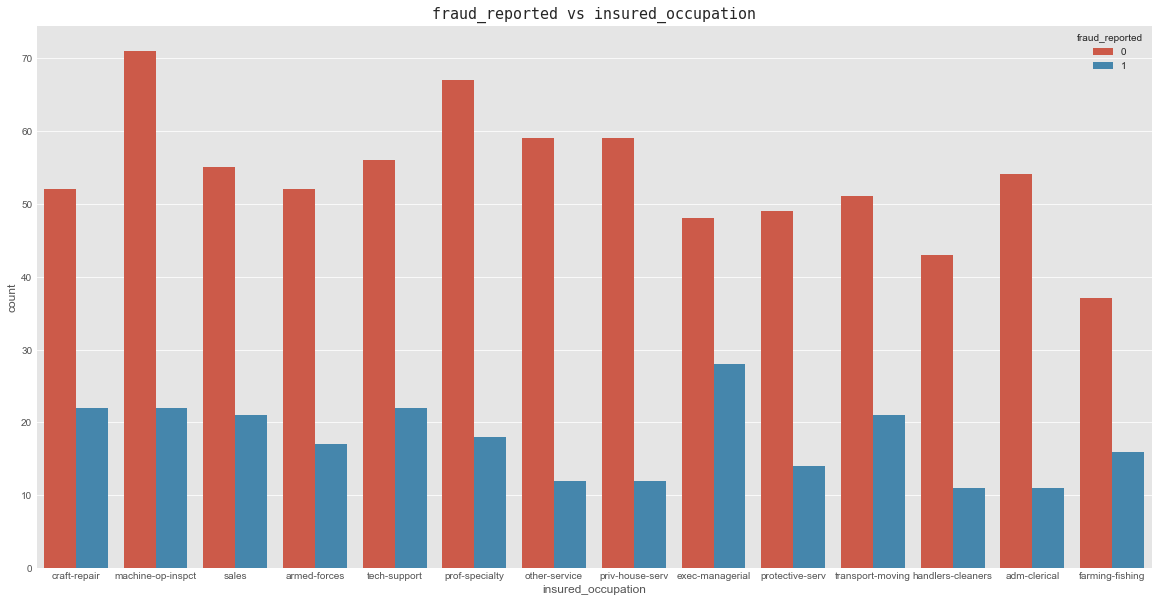

In [44]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df["insured_occupation"],hue=df["fraud_reported"])
plt.title("fraud_reported vs insured_occupation", fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.show()

From the data, it looks like people in exec-managerial positions have more number of frauds compared to other occupations.

Sales, tech-support and transport moving also have relatively high cases of fraud.

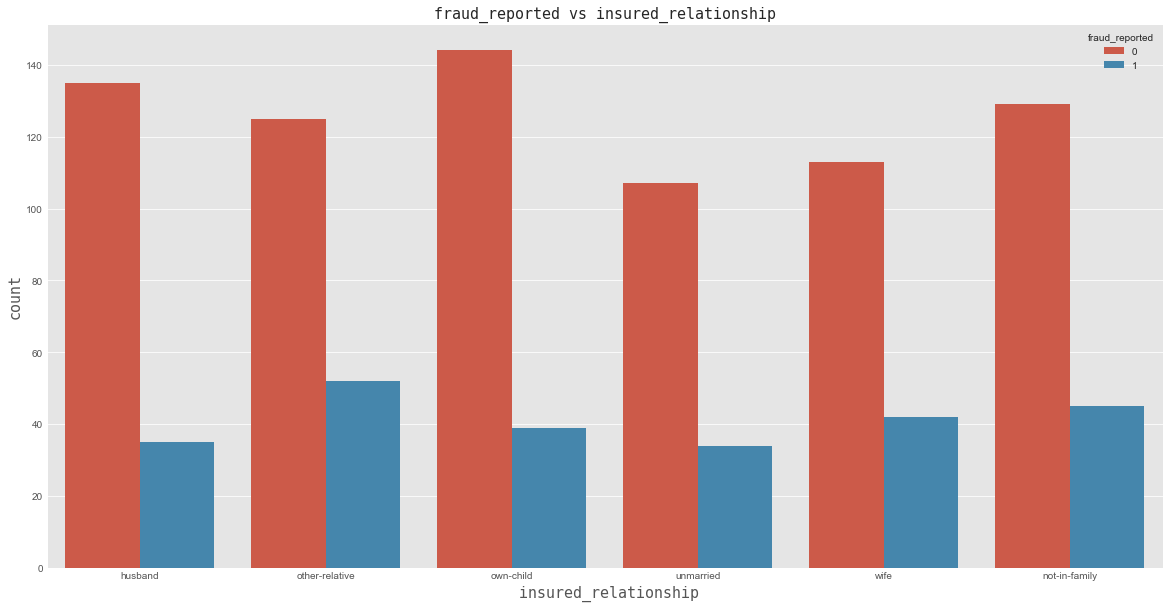

In [45]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df["insured_relationship"],hue=df["fraud_reported"])
plt.title("fraud_reported vs insured_relationship", fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel(' insured_relationship', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

Here the other-relative claim more false report for the insurance

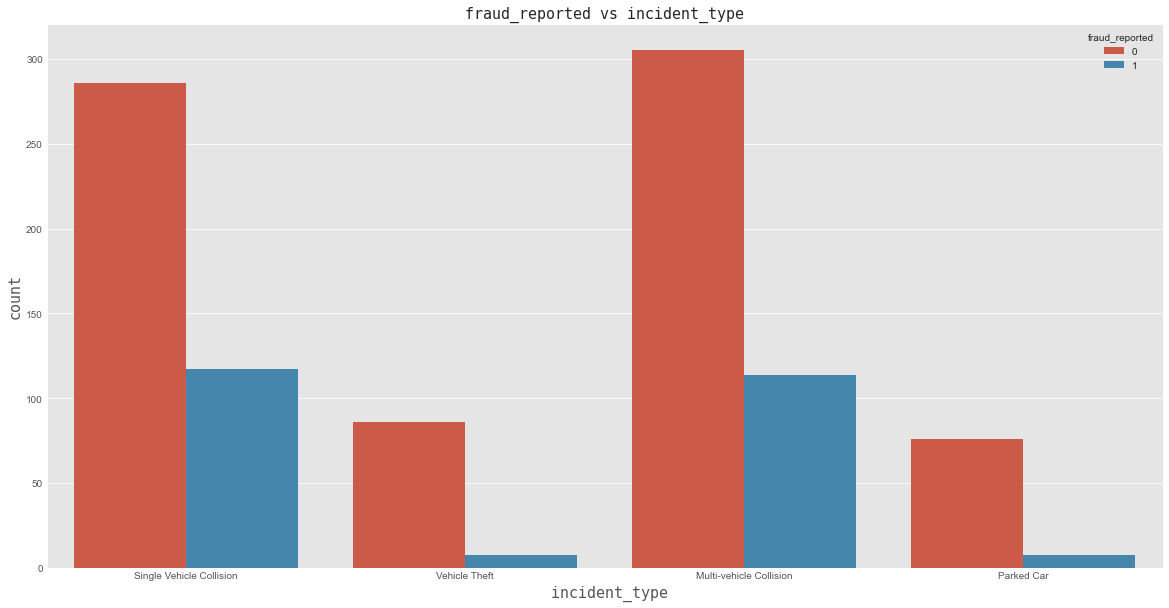

In [46]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df["incident_type"],hue=df["fraud_reported"])
plt.title("fraud_reported vs incident_type", fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel(' incident_type', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

incident_type')
Multi-vehicle and single vehicle collisions have more number of frauds compared to parked and vehicle theft. One of the reasons could be that in a collision, there is high possibility of more damage to car, as well as the passengers and hence the need to file false insurance claims.



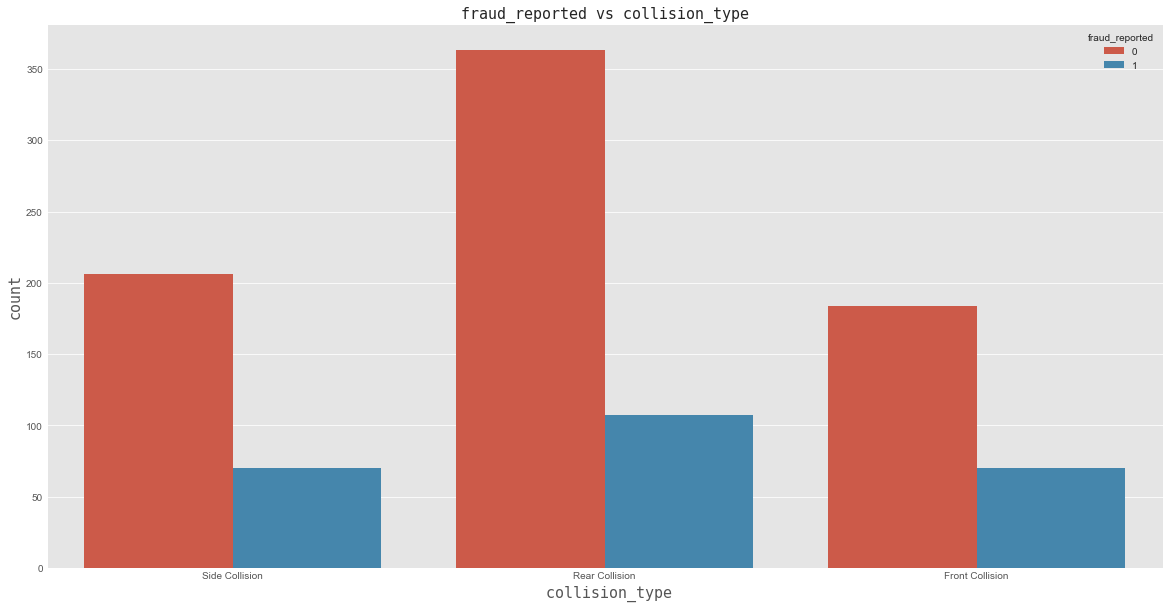

In [47]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df["collision_type"],hue=df["fraud_reported"])
plt.title("fraud_reported vs collision_type", fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel(' collision_type', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

While there are significant numbers of false claims in front and side collisions, rear collisions are the highest

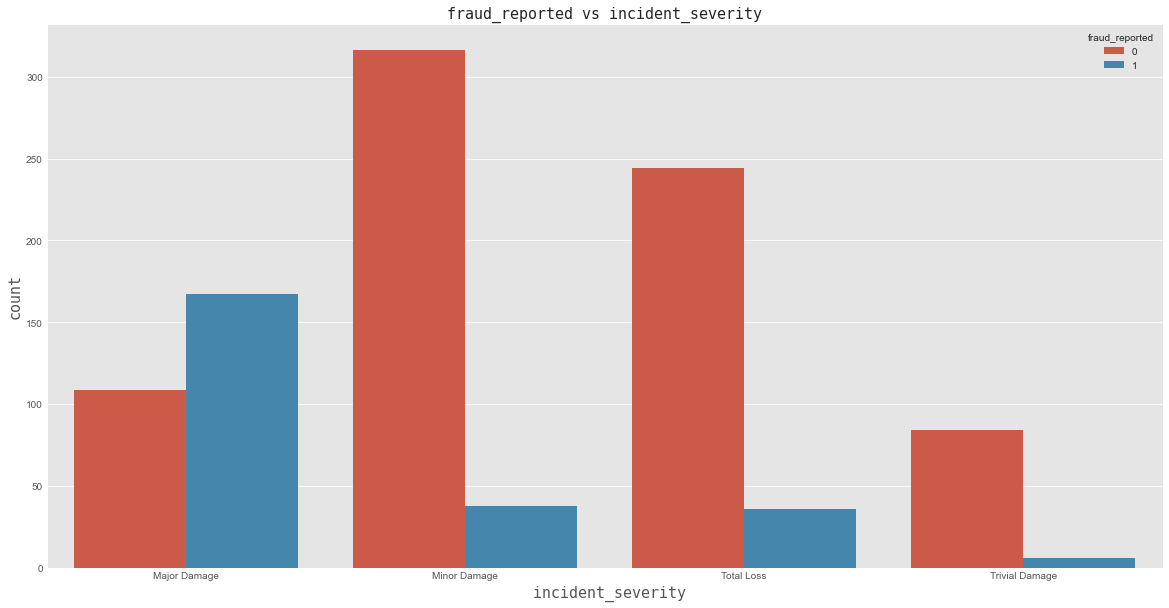

In [48]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df["incident_severity"],hue=df["fraud_reported"])
plt.title("fraud_reported vs incident_severity", fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel(' incident_severity', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()


Here, compared to minor damage, total loss and trivial damage, fraudulent claims are highest in major damage.

One reason could be that the high amount of repair cost which will be incurred by the insurer due to major damage.

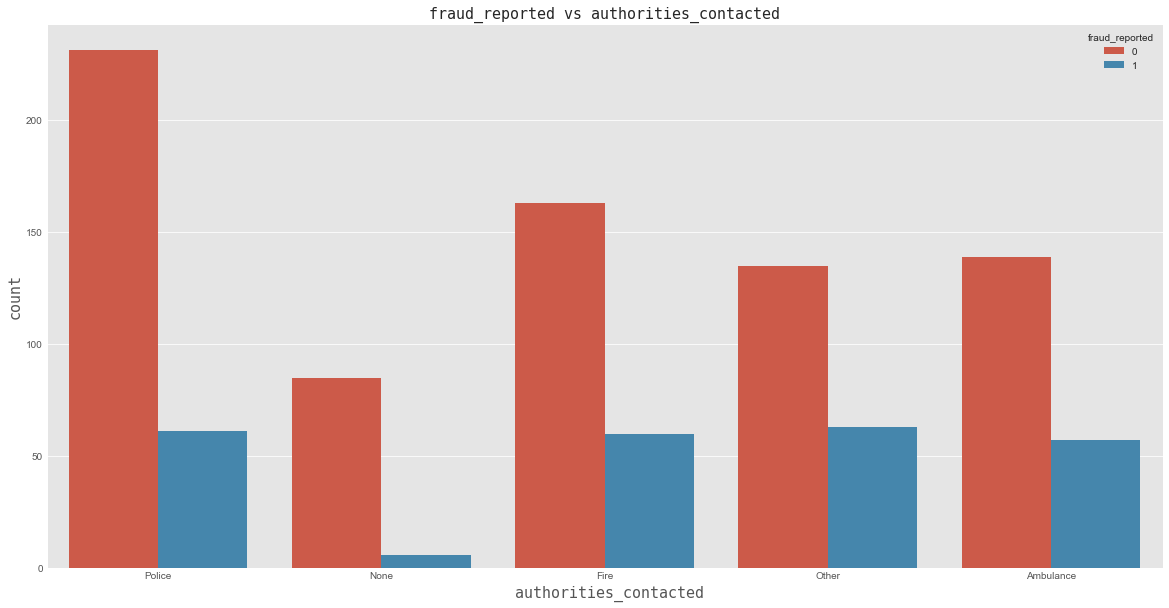

In [49]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df["authorities_contacted"],hue=df["fraud_reported"])
plt.title("fraud_reported vs authorities_contacted", fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel(' authorities_contacted', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

Here the most number of calls are called to Police and Other are the ones who fraudly claim for the insurance

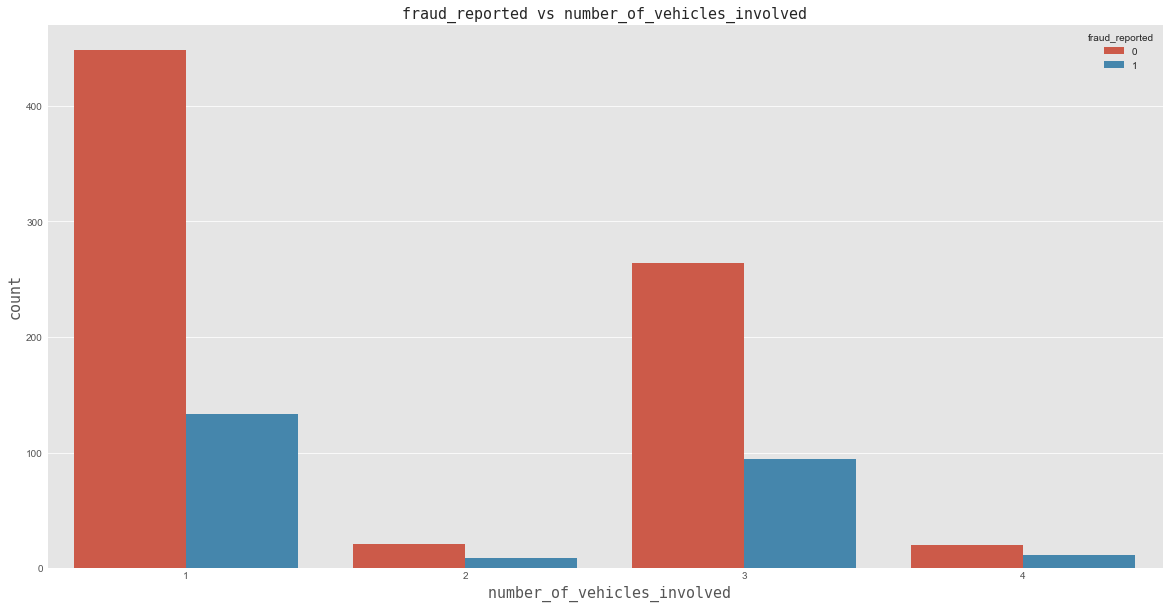

In [50]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df["number_of_vehicles_involved"],hue=df["fraud_reported"])
plt.title("fraud_reported vs number_of_vehicles_involved", fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel(' number_of_vehicles_involved', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

Here we can see that the number of vehicle involved in accident whcih is 1 are the morenumber of people who fraud claims for  Insurance.

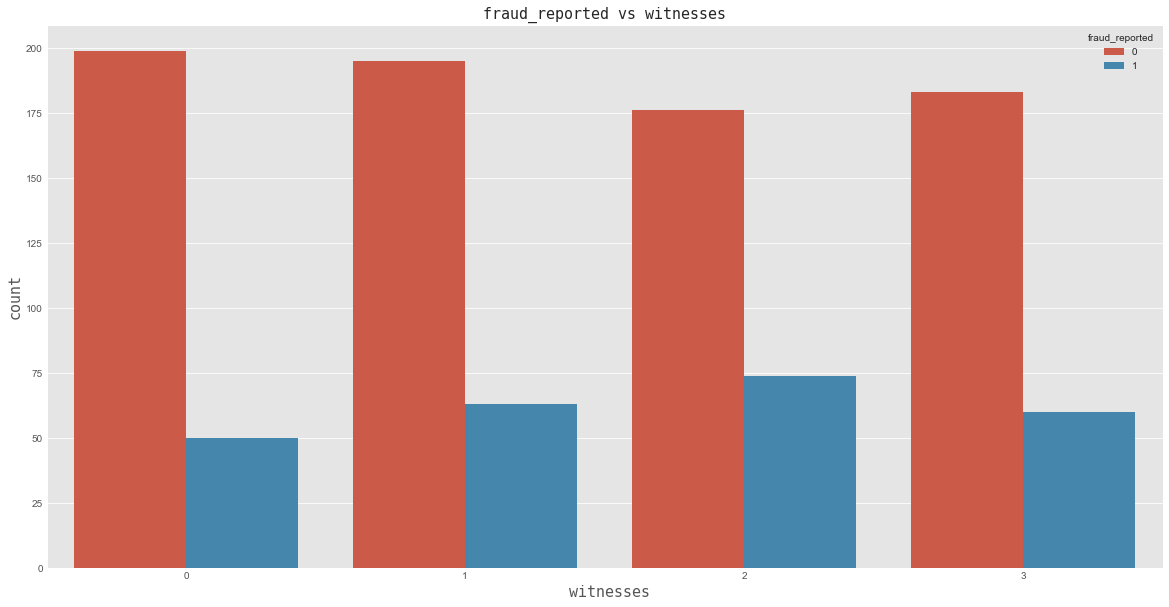

In [51]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df["witnesses"],hue=df["fraud_reported"])
plt.title("fraud_reported vs witnesses", fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel(' witnesses', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

Here the maximum number of fraud claim by the withness who are in group of 2. 

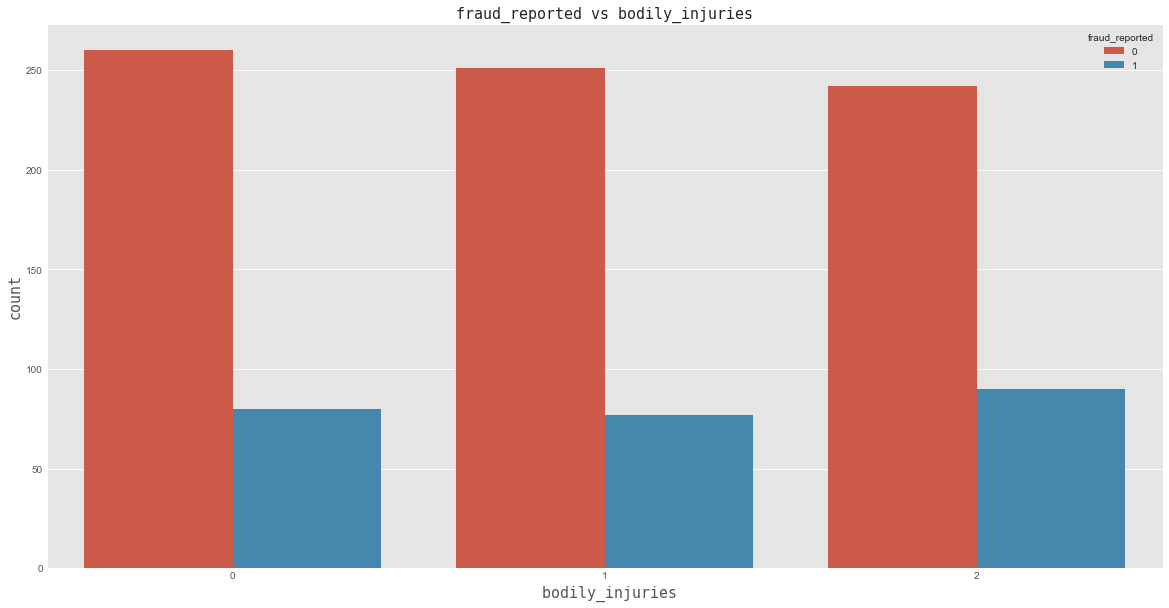

In [52]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df["bodily_injuries"],hue=df["fraud_reported"])
plt.title("fraud_reported vs bodily_injuries", fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel(' bodily_injuries', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

Almost every one equally fraudly claim for the insurance who are bodily injured.

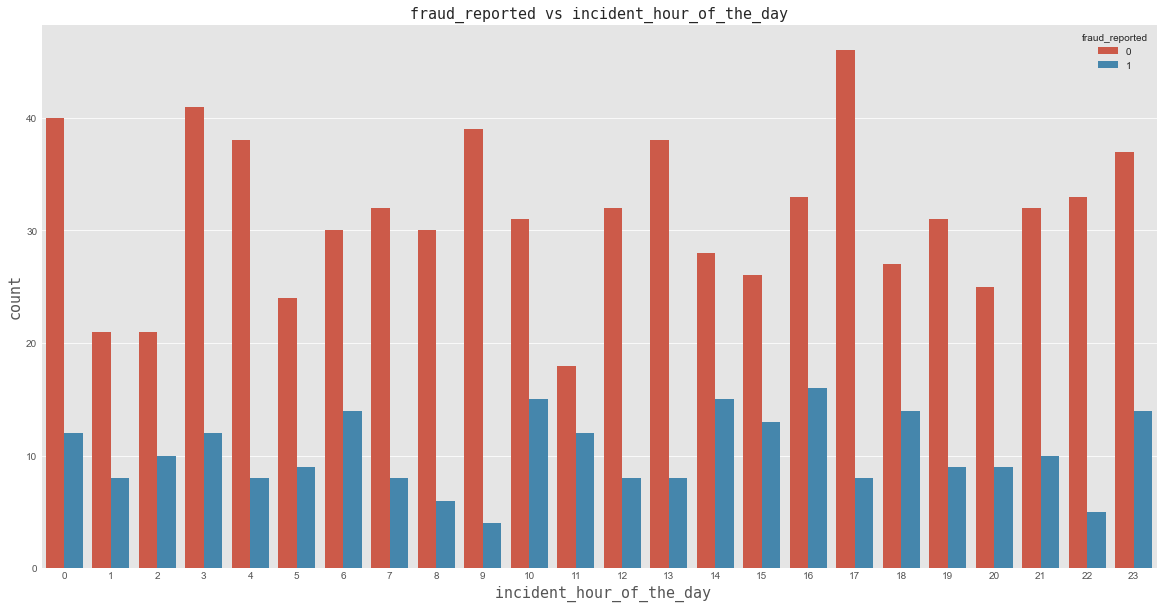

In [53]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df["incident_hour_of_the_day"],hue=df["fraud_reported"])
plt.title("fraud_reported vs incident_hour_of_the_day", fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel(' incident_hour_of_the_day', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

Here we can see that the usually people falsely claim at any hour there is no specific hour as it can be morning, afternoon, evening or mid-night

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_deductable            1000 non-null   int64  
 2   policy_annual_premium        1000 non-null   float64
 3   umbrella_limit               1000 non-null   int64  
 4   insured_sex                  1000 non-null   object 
 5   insured_education_level      1000 non-null   object 
 6   insured_occupation           1000 non-null   object 
 7   insured_relationship         1000 non-null   object 
 8   capital-gains                1000 non-null   int64  
 9   capital-loss                 1000 non-null   int64  
 10  incident_type                1000 non-null   object 
 11  collision_type               1000 non-null   object 
 12  incident_severity            1000 non-null   object 
 13  authorities_contact

In [55]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [56]:
df.skew()

months_as_customer             0.362177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
fraud_reported                 1.175051
dtype: float64

In [57]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

skew=[ 'umbrella_limit','vehicle_claim']
for index in skew:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    else:
        df.skew().loc[index]<-0.55
        df[index]=np.sqrt(df[index])

In [58]:
df.skew()

months_as_customer             0.362177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -1.146280
fraud_reported                 1.175051
dtype: float64

In [59]:
df.drop('policy_annual_premium',axis=1,inplace=True)

### Encoding Categorical columns

In [60]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [61]:
df

,months_as_customer,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1000,0.000000,1,4,2,0,53300,0,2,2,0,4,5,1,1,1,2,1,6510,13020,228.210429,1
1,228,2000,170.997595,1,4,6,2,0,0,3,1,1,4,8,1,0,0,0,0,780,780,59.245253,1
2,134,2000,170.997595,0,6,11,3,35100,0,0,1,1,4,7,3,0,2,3,0,7700,3850,151.986842,0
3,256,2000,181.712059,0,6,1,4,48900,-62400,2,0,0,4,5,1,0,1,2,0,6340,6340,225.211012,1
4,228,1000,181.712059,1,0,11,4,66000,-46000,3,1,1,2,20,1,0,0,1,0,1300,650,67.453688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,0.000000,0,5,2,4,0,0,2,0,1,1,20,1,1,0,1,0,17440,8720,247.062745,0
996,285,1000,0.000000,0,6,9,5,70900,0,2,1,0,1,23,1,1,2,3,0,18080,18080,268.923781,0
997,130,500,144.224957,0,5,1,2,35100,0,0,2,1,4,4,3,0,2,3,1,7500,7500,229.128785,0
998,458,2000,170.997595,1,0,5,5,0,0,2,1,0,3,2,1,0,0,1,1,5220,5220,191.154388,0


### Checking Outliers

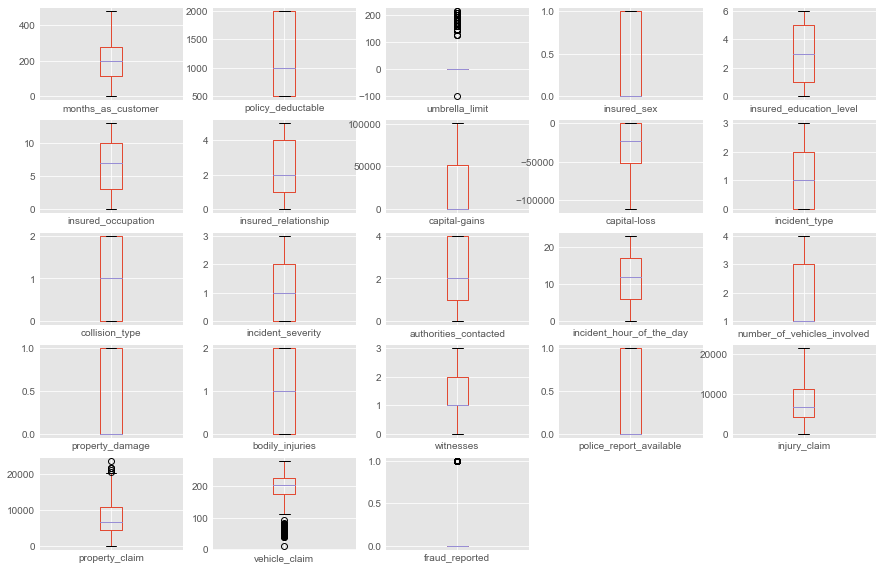

In [62]:
#Plotting the boxplot of each coumn to check the outliers
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))
plt.show()

**Removing Outliers**

In [63]:
from scipy.stats import zscore
zabs = np.abs(zscore(df))
print(np.shape(np.where(zabs >= 3)))
df_new = df[(zabs < 3).all(axis = 1)]
df_new

(2, 2)


,months_as_customer,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1000,0.000000,1,4,2,0,53300,0,2,2,0,4,5,1,1,1,2,1,6510,13020,228.210429,1
1,228,2000,170.997595,1,4,6,2,0,0,3,1,1,4,8,1,0,0,0,0,780,780,59.245253,1
2,134,2000,170.997595,0,6,11,3,35100,0,0,1,1,4,7,3,0,2,3,0,7700,3850,151.986842,0
3,256,2000,181.712059,0,6,1,4,48900,-62400,2,0,0,4,5,1,0,1,2,0,6340,6340,225.211012,1
4,228,1000,181.712059,1,0,11,4,66000,-46000,3,1,1,2,20,1,0,0,1,0,1300,650,67.453688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,0.000000,0,5,2,4,0,0,2,0,1,1,20,1,1,0,1,0,17440,8720,247.062745,0
996,285,1000,0.000000,0,6,9,5,70900,0,2,1,0,1,23,1,1,2,3,0,18080,18080,268.923781,0
997,130,500,144.224957,0,5,1,2,35100,0,0,2,1,4,4,3,0,2,3,1,7500,7500,229.128785,0
998,458,2000,170.997595,1,0,5,5,0,0,2,1,0,3,2,1,0,0,1,1,5220,5220,191.154388,0


We have a total of 2 outliers in the data. After removing the outliers, we have 998 observations left.

In [64]:
df.shape

(1000, 23)

In [65]:
df_new.shape

(998, 23)

In [66]:
df=df_new

#### Feature Selection :

In [67]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
Y = df[['fraud_reported']]

In [103]:
from sklearn.preprocessing import StandardScaler

for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))
    


####  Fixing imbalanced dataset using Oversampling :

In [74]:
from imblearn.over_sampling import SMOTE
sme = SMOTE(random_state=42)
sme.fit(X, Y)
X_resampled, Y_resampled = sme.fit_resample(X, Y)

In [75]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

fraud_reported
1                 50.0 %
0                 50.0 %
dtype: object

#### Model Training :

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [77]:
x_train, x_test, y_train, y_test = train_test_split( X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [78]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (1201, 22)
X_test shape: (301, 22)
Y_train shape: (1201, 1)
Y_test shape: (301, 1)


In [79]:
lg=LogisticRegression()
gnb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier(n_estimators=100)
ada = AdaBoostClassifier(n_estimators=100)
knn=KNeighborsClassifier()
dtc= DecisionTreeClassifier()

In [83]:
model = [lg,gnb,sv,rf,ada,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is:")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')
    score=cross_val_score(m,X_resampled,Y_resampled,cv=5).mean()
    print('Cross_val_score: ',score*100)
    print('Mean Score: ',score.mean()*100)
    print('STD Score: ',score.std())
    print()

Accuracy score of  LogisticRegression() is:
0.7109634551495017
[[104  39]
 [ 48 110]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       143
           1       0.74      0.70      0.72       158

    accuracy                           0.71       301
   macro avg       0.71      0.71      0.71       301
weighted avg       0.71      0.71      0.71       301



Cross_val_score:  74.16788482834995
Mean Score:  74.16788482834995
STD Score:  0.0

Accuracy score of  GaussianNB() is:
0.707641196013289
[[ 88  55]
 [ 33 125]]
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       143
           1       0.69      0.79      0.74       158

    accuracy                           0.71       301
   macro avg       0.71      0.70      0.70       301
weighted avg       0.71      0.71      0.70       301



Cross_val_score:  69.1109634551495
Mean Score:  69.1109634551495
STD Score:  0.0

Accuracy scor

RandomForestClassifier Model gives the highest Accuracy of 0.86 . Hence we will used it for predictions.

#### Hyperparameter Tuning

In [84]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 150, num = 10)]
max_depth.append(None)

criterion= ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion}

rfc = RandomForestClassifier()
rand_search = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_estimator_)
print(rand_search.best_score_)

RandomForestClassifier(max_depth=101, max_features='sqrt', n_estimators=88)
0.8759266943291839


### Final model training and evaluating using Best Parameteres:

In [85]:
RFC = RandomForestClassifier(max_depth=101,
                             n_estimators=88,max_features='sqrt')
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc_sc= accuracy_score(y_test,pred)
print("accuracy score :",acc_sc*100)

accuracy score : 86.04651162790698


In [86]:
#Calculating the scores of different parameters
score=cross_val_score(RFC,X_resampled,Y_resampled,cv=5,scoring='accuracy').mean()
print('Cross_val_score: ',score*100)
print('Mean Score: ',score.mean()*100)
print('STD Score: ',score.std())

Cross_val_score:  86.49723145071982
Mean Score:  86.49723145071982
STD Score:  0.0


In [87]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print("Confusion matrix \n",confusion_matrix(y_test,pred))
print("f1 score is : ",f1_score(y_test,pred))
print("classification report \n",classification_report(y_test,pred))
print("AUC ROC Score: ",roc_auc_score(y_test,pred))

Confusion matrix 
 [[128  15]
 [ 27 131]]
f1 score is :  0.8618421052631579
classification report 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       143
           1       0.90      0.83      0.86       158

    accuracy                           0.86       301
   macro avg       0.86      0.86      0.86       301
weighted avg       0.86      0.86      0.86       301

AUC ROC Score:  0.8621094095777639


### ROC Curve:

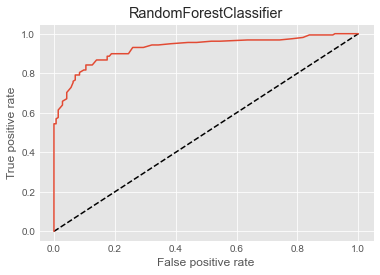

0.8621094095777639

In [88]:
y_pred_prob = RFC.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,RFC.predict(x_test))
auc_score

Here the auc roc score is 0.86 which is very good.

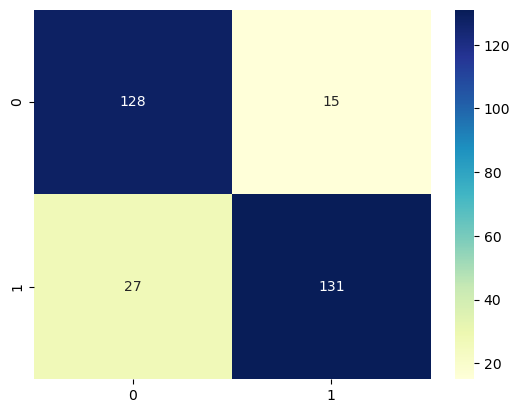

In [89]:
cm = confusion_matrix(y_test, pred)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

Here we can see that False negative are very low i.e. 27 , hence this is very useful beacuse we have to detect the fraud claim.

In [90]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       143
           1       0.90      0.83      0.86       158

    accuracy                           0.86       301
   macro avg       0.86      0.86      0.86       301
weighted avg       0.86      0.86      0.86       301



After the model evaluation , we get the :-


- precision -  0.86 and 


- recall - 0.86


-  f1- score of the model is 0.86. 


- These scores are very good ,therefore our model for prediction is fine.

### Saving the model

In [105]:
#saving the model
model=joblib.dump(RFC,'Fraud_insurance.obj')

**Conclusion:**

- In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier, Adaboost classifier and Gaussian Naive Bayes


- A hyperparameter tuned random forest classifier gives the highest accuracy score of 86.04 and Auc roc score of 0.86.
